# Python for Data Analysis using Pandas

> The last version of notebook is always found at [github.com/tommyod/awesome-pandas](https://github.com/tommyod/awesome-pandas).   
  Improvements, corrections or suggestions? **Submit a [Pull Request](https://github.com/tommyod/awesome-pandas/pulls).**
  
  ![](pandas_vs_excel_vs_sas.png)

# Table of contents


- **The setup**: anaconda, Python, pandas, Jupyter
- **Importing data**: from csv (and options), from the web, creating from scratch, convering types, rename cols
- **Summarizing data**: len(df), shape, value_counts, head, tail, max(), min(), mean, dtype, info(), describe(), memory_usage(), scatter matrix, corr, isnull, notnull, unique(), nlargest
- **Selecting and computing**: select subset of row and cols, .loc, .iloc, drop columns, assign, apply/map/applymap, multiindex
- **Filtering and sorting**: >=, AND, OR, ==, ~, str.contains, str.startswith, sort_values, sort_index, filtering on sorted/unsorted, isin()
- **Split-apply-combine and pivots**: groupby, dt.month, dt.year, groupby.mean(), agg, stack, unstack, pivot, melt, merge
- **Time series manipulations**: downsampling, upsampling, rolling, mean, simple plotting
- **Plotting**: built-in plotting, advanced plotting, matplotlib, seaborn, styles, saving
- **Modeling and machine learning**: .value, feeding data, saving data
- **Misc tips and tricks**: pandas options, vectorization, timings with %%timeit, profiling with lprun

**principles:** small examples, no more than 5 rows. one or two data sets, no more.


- (1) Setup
  - Installation, packages, Jupyter Notebooks
- (2) Importing data
  - (2.1) Importing .csv files
  - (2.2) Other ways of creating DataFrames
  - (2.3) Changing names and data types
- (3) Summarizing data
  - (3.1) Peeking at the data
  - (3.2) Null values and summary statistics
  - (3.3) Unique values, value counts and sorting
  - (3.4) Basic visualizations
- (4) Selecting and computing new columns
  - (4.1) Accessing rows, columns and data
  - (4.2) Selecting subsets of columns
  - (4.3) Selecting subsets of rows
  - (4.4) Selecting subsets of rows *and* columns
  - (4.5) Creating new columns
  - (4.6) Applying functions
- (5) Filtering and sorting
  - (5.1) Equality, non-equality and logical operators
  - (5.2) Group membership and string filtering
- (6) Split-apply-combine and pivots
  - (6.1) The groupby operation
  - (6.2) Several groups and aggregations
  - (6.3) Unstacking and stacking

---------------------------------

# (1) Setup

## Python and Anaconda

If you haven't done it yet, you need to install Python.
I recommend the [Anaconda Distribution](https://www.anaconda.com/download/) install version `3.X`.
- If you're on Windows, you will get a program called *Anaconda Prompt*. Open in and run `conda --version` to verify that everything works.
- If you're on Linux, open a terminal and run `conda --version`.

Type `conda list` to see every installed package, and `conda update --all` to update every package.

## Pandas, NumPy and matplotlib

![](https://indranilsinharoy.files.wordpress.com/2013/01/scientificpythonecosystemsi.png?w=584&h=442)

*Image source: https://indranilsinharoy.com/2013/01/06/python-for-scientific-computing-a-collection-of-resources/*

To install indiviual packages, run `conda install <package>`.   
The Anaconda distribution comes with 3 packages which this tutorial requires, namely [pandas](https://pandas.pydata.org/), [NumPy](http://www.numpy.org/) and [matplotlib](https://matplotlib.org/).
We'll also briefly use [sklearn](https://scikit-learn.org/stable/).

- **NumPy** implements $n$-dimensional arrays in Python for efficient numerical computations. See the [arXiv](https://arxiv.org/pdf/1102.1523.pdf) paper for a nice introduction. To learn basic NumPy, consider doing these [100 NumPy exercises](https://github.com/rougier/numpy-100).
- **Matplotlib** is the most popular library for plotting in Python. See the beautiful [gallery](https://matplotlib.org/gallery.html) to get an overview of the capabilities of matplotlib. Read the [Matplotlib tutorial](http://www.labri.fr/perso/nrougier/teaching/matplotlib/matplotlib.html) by Nicolas P. Rougier for an introduction.
- **Pandas** is a library for data analysis based on two objects, the [Series](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.html) and the [DataFrame](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.html).

## Jupyter

The [Jupyter Notebook](https://jupyter-notebook.readthedocs.io/en/stable/) is an environment in which you can run Python code, display graphs and work with data interactively. Think of it as a tool between a simple terminal and a full fledged IDE. Move to a directory using the `cd` command in the terminal, then run `jupyter notebook` to start up a notebook. A video introduction is [JupyterLab: Building Blocks for Interactive Computing](https://www.youtube.com/watch?v=Ejh0ftSjk6g).

## Importing packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import KDEpy
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

To make this Jupyter Notebook reproducible, we list versions of the libraries we will be using.

In [2]:
import datetime

print('Today is', datetime.datetime.utcnow())
print('-'*2**6)

for lib in [pd, np, matplotlib, KDEpy, sklearn]:
    print(f'{lib.__name__.ljust(12)} version {lib.__version__}')

Today is 2018-12-18 19:53:46.395583
----------------------------------------------------------------
pandas       version 0.23.4
numpy        version 1.15.3
matplotlib   version 2.2.3
KDEpy        version 0.6.9
sklearn      version 0.20.0


**Using Jupyter Notebooks**:

- Useful shortcuts.
- Executing terminal commands from within the notebook.
- Timing cells.
- Using markdown and $\LaTeX{}$.
- Pitfalls when using notebooks: state, order of execution, tidyness.

# (2) Importing data

Starting a cell with a `!` let's us use terminal commands. The UNIX `head` command shows the first rows of the file.

## (2.1) Importing `.csv` files

In [3]:
!tree . -L 2

.
├── data
│   ├── google_trends.csv
│   ├── movie_metadata.csv
│   ├── wine_data.csv
│   └── world_population_history.csv
├── pandas_vs_excel_vs_sas.png
├── Tutorial.ipynb
└── Tutorial.py

1 directory, 7 files


> **Interested in learning UNIX commands?** I recommend [The Linux Command Line](https://www.amazon.com/Linux-Command-Line-Complete-Introduction-ebook/dp/B006X2QEQS) and [Data Science at the Command Line](https://www.amazon.com/Data-Science-Command-Line-Time-Tested/dp/1491947853).

In [4]:
!head data/movie_metadata.csv -n 2

The file has many columns, so we'll only load a couple into a pandas DataFrame.
To familiarize ourselves with with [magic commands](http://ipython.readthedocs.io/en/stable/interactive/magics.html), we'll use `%%time` to time the execution of the cell below.

In [5]:
%%time

cols_to_use = ['movie_title', 'director_name', 'country', 'content_rating', 'imdb_score', 'gross']
df = pd.read_csv(r'data/movie_metadata.csv', sep=',', usecols=cols_to_use)
print(f'Loaded data of size {df.shape} into memory.')

Loaded data of size (5043, 6) into memory.
CPU times: user 52.4 ms, sys: 16.2 ms, total: 68.6 ms
Wall time: 67.8 ms


The `df.shape` attribute gives the rows and columns of the DataFrame.

In [6]:
df.shape # Alternatively, use len(df) for row count

(5043, 6)

## (2.2) Other ways of creating DataFrames

**The DataFrame**

> Two-dimensional size-mutable, potentially heterogeneous tabular data
structure with **labeled axes** (rows and columns). Arithmetic operations
align on both row and column labels. Can be thought of as a **dict-like
container for Series objects**. The primary pandas data structure.

**Creating a DataFrame from scratch**

In [7]:
pd.DataFrame({'name':['Max', 'Mark', 'Mia'], 'age':[31, 25, 38]})

,name,age
0,Max,31
1,Mark,25
2,Mia,38


**Reading a HTML table from the web**

In [149]:
# Read HTML tables into a list of DataFrame objects.
tables = pd.read_html(r'https://en.wikipedia.org/wiki/List_of_Germans_by_net_worth', header=0)

df_net_worth = tables[0]

assert len(df_net_worth) > 0 
assert df_net_worth.Name.is_unique


df_net_worth.head()

,World ranking,Name,Citizenship,Net worth (USD),Sources of wealth
0,21,Georg Schaeffler,Germany,26.9 billion,Schaeffler Group
1,37,Beate Heister (b. Albrecht) & Karl Albrecht Jr.,Germany,21.3 billion,Aldi Süd
2,46,Dieter Schwarz,Germany,19.4 billion,Schwarz Gruppe
3,49,Theo Albrecht Jr.,Germany,19 billion,Aldi Nord and Trader Joe's
4,50,Michael Otto,Germany,18.1 billion,Otto Group


**Reading from databases is also possible.**

Reading from Microsoft SQL using `pyodbc` and `pd.read_sql(sql_code, connection)`.

---------

> **Gotcha.** Methods on DataFrames return a new instance by default. In other words, they behave like methods on *immutable* Python object, and not like methods on *mutable* objects.

In [9]:
# Lists are MUTABLE
scores = [6, 2, 4, 9, 1]
scores.sort()  # Changes the object in-place, returns None
print(scores)

# Strings are IMMUTABLE
my_name = 'tommy'
my_name = my_name.capitalize()  # A new instance is returned
print(my_name)

[1, 2, 4, 6, 9]
Tommy


## (2.3) Changing names and data types

In [10]:
# Alter axes labels
df_net_worth = (df_net_worth
                .rename(columns={'Net worth (USD)': 'net_worth',
                                'World ranking': 'world_ranking',
                                'Sources of wealth': 'wealth_source'}))


df.rename(columns=str.capitalize).head(2)

,Director_name,Gross,Movie_title,Country,Content_rating,Imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


In [11]:
df_net_worth['net_worth_num'] = (df_net_worth['net_worth']
                             .str
                             .replace(' billion', '')
                             .apply(float))

df_net_worth.head(2)

,world_ranking,Name,Citizenship,net_worth,wealth_source,net_worth_num
0,21,Georg Schaeffler,Germany,26.9 billion,Schaeffler Group,26.9
1,37,Beate Heister (b. Albrecht) & Karl Albrecht Jr.,Germany,21.3 billion,Aldi Süd,21.3


# (3) Summarizing data

This section summarizes some important functions, and shows how to summarize data.

## (3.1) Peeking at the data

Three methods that are useful when peeking at the data are `df.head`, `df.tail` and `df.sample`.
Head and tail are $\mathcal{O}(1)$ operations, while sample is $\mathcal{O}(n)$, where $n$ is the number of rows.
For small datasets, this makes no difference in practice. We'll use `df.sample` here.

In [12]:
# Return the first `n` rows.
df.head(n=2)  # df.tail(n=2) returns the last rows

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1


In [13]:
df.sample(n=2, replace=False, weights=None, random_state=None)

,director_name,gross,movie_title,country,content_rating,imdb_score
765,Graham Annable,50807639.0,The Boxtrolls,USA,PG,6.8
4064,Kunihiko Yuyama,NaN,Pokémon 3: The Movie,Japan,G,5.6


## (3.2) Null values and summary statistics

We should make sure the data types are correct. To do so, we can use `df.dtypes`, or `df.info()` for some more information.

In [14]:
# Print a concise summary of a DataFrame
df.info(verbose=True, memory_usage=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 6 columns):
director_name     4939 non-null object
gross             4159 non-null float64
movie_title       5043 non-null object
country           5038 non-null object
content_rating    4740 non-null object
imdb_score        5043 non-null float64
dtypes: float64(2), object(4)
memory usage: 236.5+ KB


We have some null values. Let's count them by chaining `df.isnull()` and `df.sum()`.

In [15]:
# Detect missing values -> sum over rows
null_values = df.isnull().sum(axis=0)
null_values

director_name     104
gross             884
movie_title         0
country             5
content_rating    303
imdb_score          0
dtype: int64

The result of the above is not a DataFrame, but a Series.

In [16]:
type(null_values)

pandas.core.series.Series

![alt text](https://www.mathsisfun.com/algebra/images/scalar-vector-matrix.svg)
*Image source:* https://www.mathsisfun.com/algebra/scalar-vector-matrix.html


We can make the output prettier by converting null_values to a DataFrame using the `to_frame()` method, then transposing using `.T`, and finally renaming the first index.

In [17]:
null_values.to_frame().T.rename(index={0: 'Missing values'})

,director_name,gross,movie_title,country,content_rating,imdb_score
Missing values,104,884,0,5,303,0


The above is called method chaining, and can be written like so:

In [18]:
(df
    .isnull()    # Figure out whether every entry is null (missing), or not
    .sum(axis=0) # Sum over each column, axis=0 is the default
    .to_frame()  # The result is a Series, convert to DataFrame
    .T           # Transpose (switch rows and columns)
    .rename(index={0:'Missing values'}) # Rename the index and show it
)

,director_name,gross,movie_title,country,content_rating,imdb_score
Missing values,104,884,0,5,303,0


A tour of summarization would not be complete without `df.describe()`.
Calling `df.count()`, `df.nunique()`, `df.mean()`, `df.std()`, `df.min()`, `df.quantile()`, `df.max()` is also possible.

In [19]:
df.describe(percentiles=[0.5], include='all').fillna('')

,director_name,gross,movie_title,country,content_rating,imdb_score
count,4939,4159,5043,5038,4740,5043
unique,2398,,4917,65,18,
top,Steven Spielberg,,Victor Frankenstein,USA,R,
freq,26,,3,3807,2118,
mean,,4.84684e+07,,,,6.44214
std,,6.8453e+07,,,,1.12512
min,,162,,,,1.6
50%,,2.55175e+07,,,,6.6
max,,7.60506e+08,,,,9.5


In [20]:
df.dropna(axis=0, how='any').shape

(4092, 6)

## (3.3) Unique values, value counts and sorting

In [21]:
df.content_rating.unique()  # Not the same as: df.content_rating.is_unique

array(['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G',
       'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7',
       'GP', 'Passed', 'M'], dtype=object)

In [22]:
print(df.content_rating.drop_duplicates().tolist())

['PG-13', nan, 'PG', 'G', 'R', 'TV-14', 'TV-PG', 'TV-MA', 'TV-G', 'Not Rated', 'Unrated', 'Approved', 'TV-Y', 'NC-17', 'X', 'TV-Y7', 'GP', 'Passed', 'M']


In [23]:
df.content_rating.value_counts()

R            2118
PG-13        1461
PG            701
Not Rated     116
G             112
Unrated        62
Approved       55
TV-14          30
TV-MA          20
TV-PG          13
X              13
TV-G           10
Passed          9
NC-17           7
GP              6
M               5
TV-Y7           1
TV-Y            1
Name: content_rating, dtype: int64

In [24]:
df[['movie_title', 'gross']].nlargest(3, 'gross')

,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0


In [25]:
# Sort by country, then by IMDB_score. Put NA values last
df.sort_values(by=['country', 'imdb_score'], 
               ascending=[True, False], 
               na_position='last').head()

,director_name,gross,movie_title,country,content_rating,imdb_score
4735,Siddiq Barmak,1127331.0,Osama,Afghanistan,PG-13,7.4
4000,Juan José Campanella,20167424.0,The Secret in Their Eyes,Argentina,R,8.2
4415,Fabián Bielinsky,1221261.0,Nine Queens,Argentina,R,7.9
4666,Jorge Gaggero,NaN,Live-In Maid,Argentina,Unrated,7.2
4450,Lucrecia Martel,304124.0,The Holy Girl,Argentina,R,6.7


## (3.4) Basic visualizations

Some quick visualizations.

In [26]:
df.corr(method='pearson')

,gross,imdb_score
gross,1.000000,0.198021
imdb_score,0.198021,1.000000


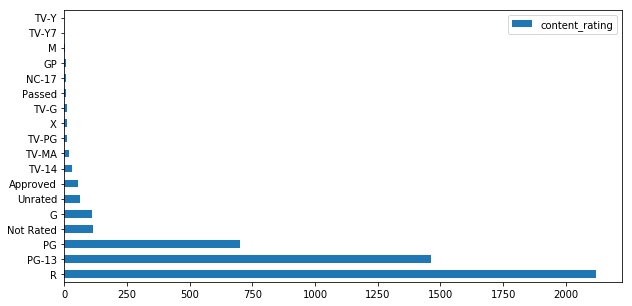

In [27]:
(df.content_rating
 .value_counts()
 .to_frame()  # Below are the default values, except `figsize`
 .plot.barh(subplots=False, sharex=None, sharey=False, layout=None, 
            figsize=(10, 5), use_index=True, title=None, grid=None, legend=True, 
            style=None, logx=False, logy=False, loglog=False, xticks=None, 
            yticks=None, xlim=None, ylim=None, rot=None, fontsize=None, 
            colormap=None, table=False, yerr=None, xerr=None, 
            secondary_y=False, sort_columns=False));

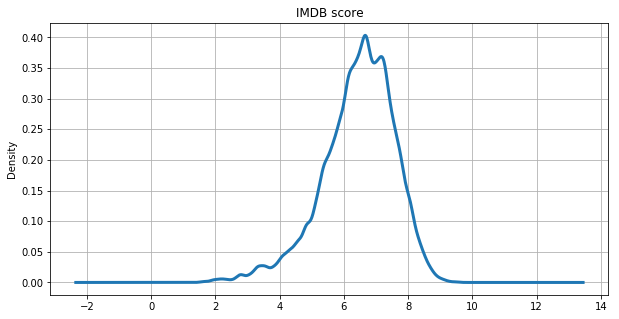

In [28]:
df.imdb_score.plot.kde(bw_method=0.09, grid=True, title='IMDB score', lw=3, figsize=(10, 5));

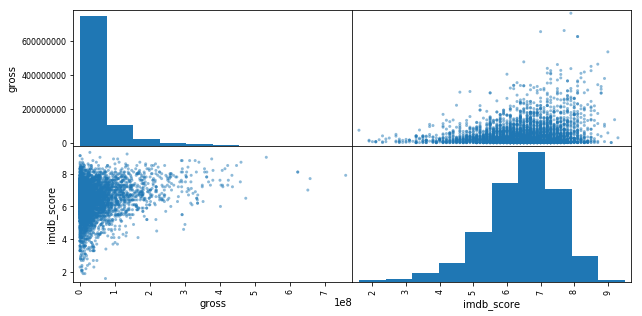

In [29]:
plot = pd.plotting.scatter_matrix(df, alpha=0.5, figsize=(10, 5))

# (4) Selecting and computing new columns

This section is about selecting subsets of a datset, or creating new data from existing data, i.e.:

- Selecting a single column, or a subset of columns
- Selecting a subset of rows, i.e. filtering
- Chaining the above operations to do both


## (4.1) Accessing rows, columns and data

In [30]:
df.columns

Index(['director_name', 'gross', 'movie_title', 'country', 'content_rating',
       'imdb_score'],
      dtype='object')

In [31]:
df.index

RangeIndex(start=0, stop=5043, step=1)

In [32]:
# This is very useful when piping data to other libraries
df.values

array([['James Cameron', 760505847.0, 'Avatar\xa0', 'USA', 'PG-13', 7.9],
       ['Gore Verbinski', 309404152.0,
        "Pirates of the Caribbean: At World's End\xa0", 'USA', 'PG-13',
        7.1],
       ['Sam Mendes', 200074175.0, 'Spectre\xa0', 'UK', 'PG-13', 6.8],
       ...,
       ['Benjamin Roberds', nan, 'A Plague So Pleasant\xa0', 'USA', nan,
        6.3],
       ['Daniel Hsia', 10443.0, 'Shanghai Calling\xa0', 'USA', 'PG-13',
        6.3],
       ['Jon Gunn', 85222.0, 'My Date with Drew\xa0', 'USA', 'PG', 6.6]],
      dtype=object)

In [33]:
df.gross.dropna().values

array([7.60505847e+08, 3.09404152e+08, 2.00074175e+08, ...,
       4.58400000e+03, 1.04430000e+04, 8.52220000e+04])

## (4.2) Selecting subsets of columns

In [34]:
print(df.columns.tolist())  # Get the columns

['director_name', 'gross', 'movie_title', 'country', 'content_rating', 'imdb_score']


In [35]:
df.director_name.head(3)  # Alternatively, use df['director_name'].head(3)

0     James Cameron
1    Gore Verbinski
2        Sam Mendes
Name: director_name, dtype: object

Selecting two or more columns.

In [36]:
df[['movie_title', 'country']].head(2)

,movie_title,country
0,Avatar,USA
1,Pirates of the Caribbean: At World's End,USA


The most useful selection function is `df.loc[[row1, row2, ...], [col1, col2, ...]]`.

- `df.loc[:, [col1, col2]]` selects every row, and columns `[col1, col2]`
- `df.loc[[row1, row2], :]` selects rows `[row1, row2]`, and every column

In [37]:
df.loc[:, ['movie_title', 'country']].head(2)

,movie_title,country
0,Avatar,USA
1,Pirates of the Caribbean: At World's End,USA


In [38]:
a = df.loc[:, 'gross']  # Returns a Series
b = df.loc[:, ['gross']]  # Returns a DataFrame

print(type(a))
print(type(b))

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


Instead of selecting a subset of columns to *keep*, we can select a subset to *drop*.

In [39]:
# Drop specified labels from rows or columns
df.drop(columns=['director_name', 'gross', 'movie_title']).head(3)

,country,content_rating,imdb_score
0,USA,PG-13,7.9
1,USA,PG-13,7.1
2,UK,PG-13,6.8


In [40]:
# Integer-location based indexing
df.iloc[1:3, [0, 1, 2]]

,director_name,gross,movie_title
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End
2,Sam Mendes,200074175.0,Spectre


## (4.3) Selecting subsets of rows

In [41]:
# Return the first `n` rows.
df.head(1)

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9


In [42]:
# Access a group of rows and columns by label(s) or a boolean array.
df.loc[[0], :]

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9


In [43]:
df.loc[[0]]

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9


In [44]:
# Top three movies / TV-series not from the USA
df[df.country != 'USA'].nlargest(3, 'imdb_score')

,director_name,gross,movie_title,country,content_rating,imdb_score
2765,John Blanchard,NaN,Towering Inferno,Canada,NaN,9.5
2824,NaN,447093.0,Dekalog,Poland,TV-MA,9.1
3207,NaN,447093.0,Dekalog,Poland,TV-MA,9.1


In [45]:
# Best non-American films, with no missing information
mask = (df.country != 'USA') & (df.isnull().sum(axis=1) == 0)
df[mask].nlargest(3, 'imdb_score')

,director_name,gross,movie_title,country,content_rating,imdb_score
4498,Sergio Leone,6100000.0,"The Good, the Bad and the Ugly",Italy,Approved,8.9
270,Peter Jackson,313837577.0,The Lord of the Rings: The Fellowship of the R...,New Zealand,PG-13,8.8
4029,Fernando Meirelles,7563397.0,City of God,Brazil,R,8.7


## (4.4) Selecting subsets of rows *and* columns

In [46]:
# Above average movies, with the title containing 'ring'
row_mask = ((df.imdb_score > df.imdb_score.mean()) & 
             df.movie_title.str.contains('ring'))
df.loc[row_mask, ['director_name', 'movie_title', 'country']]

,director_name,movie_title,country
1196,James Wan,The Conjuring 2,USA
1562,Martin Scorsese,Bringing Out the Dead,USA
2163,James Wan,The Conjuring,USA
2765,John Blanchard,Towering Inferno,Canada
2969,Peter Webber,Girl with a Pearl Earring,UK
3419,NaN,Wuthering Heights,UK
3858,Todd Solondz,Life During Wartime,USA
4298,Lance Mungia,Six-String Samurai,USA


In [47]:
# Columns containing and underscore
cols = [c for c in df.columns if '_' in c]
df.loc[:, cols].head()

,director_name,movie_title,content_rating,imdb_score
0,James Cameron,Avatar,PG-13,7.9
1,Gore Verbinski,Pirates of the Caribbean: At World's End,PG-13,7.1
2,Sam Mendes,Spectre,PG-13,6.8
3,Christopher Nolan,The Dark Knight Rises,PG-13,8.5
4,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,NaN,7.1


In [48]:
# Columns containing and underscore
numeric_cols = df.dtypes[df.dtypes == np.float].index.tolist()
df.loc[:, numeric_cols].head()

,gross,imdb_score
0,760505847.0,7.9
1,309404152.0,7.1
2,200074175.0,6.8
3,448130642.0,8.5
4,NaN,7.1


## (4.5) Creating new columns

In [49]:
temp = df.copy()  # Copy the DataFrame

# Create a new column - based on the gross income
temp['log_gross'] = temp['gross'].apply(np.log10)

temp.head(2)

,director_name,gross,movie_title,country,content_rating,imdb_score,log_gross
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9,8.881103
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1,8.490526


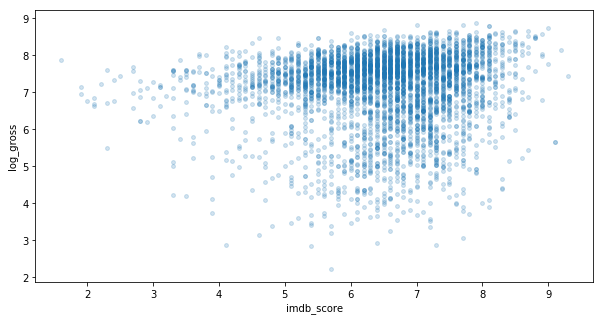

In [50]:
temp.plot.scatter(x='imdb_score', y='log_gross', alpha=0.2, s=15, figsize=(10, 5));

In [51]:
# Assign new columns to a DataFrame, returning a new object
# (a copy) with the new columns added to the original ones.
(temp.assign(log_gross=lambda df:df.gross.apply(np.log10))).head()

# One advantage is that method chaining can be used
(temp
     .assign(log_gross=lambda df:df.gross.apply(np.log10)) # Create a new column
     .loc[lambda df:df.log_gross > 8, ['country', 'content_rating', 'log_gross']] # Filter
     .groupby(['country', 'content_rating']) # Group by and mean
     .mean()
     .reset_index() # Reset the index to sort
     .sort_values(['country', 'log_gross'], ascending=[True, False]) # Sort the results
     .set_index(['country', 'content_rating']) # Re-index
     .assign(log_gross=lambda df:df.log_gross.round(2)) # Re-define the column and round it
     .head(5)
)

log_gross
country   content_rating           
Australia PG                   8.22
          PG-13                8.19
          R                    8.17
Canada    PG-13                8.35
          PG                   8.05

## (4.6) Applying functions

On a `pd.Series`:

- `pd.Series.map` applies an elementwise $f: \mathbb{R} \to \mathbb{R}$ function (e.g. `str`, or `float`)
- `pd.Series.apply` applies a vectorized $f: \mathbb{R}^n \to \mathbb{R}^n$ function  (e.g. `log`, or `sin`)
- `pd.Series.aggregate` applies an aggreation $f: \mathbb{R}^n \to \mathbb{R}$ function  (e.g. `mean`, or `std`)

On a `pd.DataFrame`:

- `pd.DataFrame.applymap` applies an elementwise $f: \mathbb{R} \to \mathbb{R}$ function
- `pd.DataFrame.apply` applies a vectorized $f: \mathbb{R}^n \to \mathbb{R}^n$ function
- `pd.DataFrame.aggregate` applies an aggreation $f: \mathbb{R}^n \to \mathbb{R}$ function

In [52]:
# Map values of Series using input correspondence (a dict, Series, or function).
df.gross.dropna().map(int).head(2)

0    760505847
1    309404152
Name: gross, dtype: int64

In [53]:
# Dictionaries are also maps, but brittle since no keys maps to NaN
(df.content_rating
    .map({'PG-13':'inappropriate for children under 13', 
          'PG': 'may not be suitable for children'}, na_action='ignore')
    .value_counts(dropna=False)
    .to_frame())

,content_rating
NaN,2881
inappropriate for children under 13,1461
may not be suitable for children,701


The `df.apply` method applies a NumPy [ufunc](https://docs.scipy.org/doc/numpy-1.15.1/reference/ufuncs.html).

> A *universal function* (or ufunc for short) is a function that operates on ndarrays in an **element-by-element** fashion.

In [54]:
# Invoke function on values of Series. Can be ufunc (a NumPy function
# that applies to the entire Series) or a Python function that only works
# on single values
df.gross.dropna().apply(np.log10).head(2)

0    8.881103
1    8.490526
Name: gross, dtype: float64

In [55]:
# Aggregate using one or more operations over the specified axis.
df.gross.dropna().aggregate(np.mean, axis=0)

48468407.52680933

---------------

In [56]:
df.loc[:, ['gross', 'imdb_score']].dropna(how='any').apply(np.log).head(2)

,gross,imdb_score
0,20.449494,2.066863
1,19.550159,1.960095


In [57]:
df.loc[:, ['gross', 'imdb_score']].dropna(how='any').applymap(int).head(2)

,gross,imdb_score
0,760505847,7
1,309404152,7


In [58]:
df.loc[:, ['gross', 'imdb_score']].dropna(how='any').mean().head(2)

gross         4.846841e+07
imdb_score    6.469897e+00
dtype: float64

In [59]:
df.loc[:, ['gross', 'imdb_score']].dropna(how='any').aggregate(np.mean, axis=0)

gross         4.846841e+07
imdb_score    6.469897e+00
dtype: float64

# (5) Filtering and sorting

We've already seen basic filtering. 

- `==` defines equality
- `!=` defines inquality equality
- `~` negates logic, e.g. `True` -> `False`
- `&` represents elementwise `and`
- `|` represents elementwise `or`

Remember to parenthesize expressions, write:

> `(df.col_A > 5) & (df.col_B <= 5)`



## (5.1) Equality, non-equality and logical operators

In [60]:
# Movies and TV shows from Norway
df[df.country == 'Norway'].head(3)

,director_name,gross,movie_title,country,content_rating,imdb_score
2594,NaN,NaN,Lilyhammer,Norway,TV-MA,8.1
3336,Nils Gaup,NaN,Shipwrecked,Norway,PG,6.7
3690,Morten Tyldum,1196752.0,Headhunters,Norway,R,7.6


In [61]:
mask = ((df.imdb_score > 8) & (df.country != 'USA') & (df.gross > 10**6))
df[mask].nlargest(3, columns=['imdb_score'])

,director_name,gross,movie_title,country,content_rating,imdb_score
4498,Sergio Leone,6100000.0,"The Good, the Bad and the Ugly",Italy,Approved,8.9
270,Peter Jackson,313837577.0,The Lord of the Rings: The Fellowship of the R...,New Zealand,PG-13,8.8
4029,Fernando Meirelles,7563397.0,City of God,Brazil,R,8.7


## (5.2) Group membership and string filtering

In [62]:
# Top three movies from Japan or Hong Kong
df[df.country.isin(['Japan', 'Hong Kong'])].nlargest(5, 'imdb_score')

,director_name,gross,movie_title,country,content_rating,imdb_score
4747,Akira Kurosawa,269061.0,Seven Samurai,Japan,Unrated,8.7
2373,Hayao Miyazaki,10049886.0,Spirited Away,Japan,PG,8.6
2323,Hayao Miyazaki,2298191.0,Princess Mononoke,Japan,PG-13,8.4
98,Hideaki Anno,NaN,Godzilla Resurgence,Japan,NaN,8.2
204,Hideaki Anno,NaN,Godzilla Resurgence,Japan,NaN,8.2


In [63]:
# Movies and TV shows NOT from scandinavia
df[~df.country.isin(['Norway, Sweden', 'Denmark'])].head(3)

,director_name,gross,movie_title,country,content_rating,imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1
2,Sam Mendes,200074175.0,Spectre,UK,PG-13,6.8


In [64]:
# Contains the word 'lord'
mask = df.movie_title.str.lower().str.contains("lord")

 # Gross better than 25 % of the movies
mask = mask & (df.gross > df.gross.quantile(q=[0.25]).values[0])

df[mask]

,director_name,gross,movie_title,country,content_rating,imdb_score
270,Peter Jackson,313837577.0,The Lord of the Rings: The Fellowship of the R...,New Zealand,PG-13,8.8
339,Peter Jackson,377019252.0,The Lord of the Rings: The Return of the King,USA,PG-13,8.9
340,Peter Jackson,340478898.0,The Lord of the Rings: The Two Towers,USA,PG-13,8.7
1170,Andrew Niccol,24127895.0,Lord of War,USA,R,7.6
1974,Catherine Hardwicke,11008432.0,Lords of Dogtown,USA,PG-13,7.1


# (6) Split-apply-combine and pivots

## (6.1) The groupby operation

![](https://data36.com/wp-content/uploads/2017/06/SQL-GROUP-BY-clause-768x540.png)

*Image source is https://data36.com/sql-functions-beginners-tutorial-ep3/*

In [65]:
df[['country', 'imdb_score']].head()

,country,imdb_score
0,USA,7.9
1,USA,7.1
2,UK,6.8
3,USA,8.5
4,NaN,7.1


In [66]:
df.groupby(df.country).mean().head(3)

,gross,imdb_score
country,,
Afghanistan,1.127331e+06,7.4
Argentina,7.230936e+06,7.5
Aruba,1.007614e+07,4.8


Directors with the most movies.

In [67]:
(df
 .groupby(df.director_name)
 .nunique()
 .movie_title
 .nlargest(5)
 .to_frame()
)

,movie_title
director_name,
Steven Spielberg,26
Woody Allen,22
Clint Eastwood,20
Martin Scorsese,20
Ridley Scott,16


## (6.2) Several groups and aggregations

A group can be a combination of columns, e.g. [`country`, `content_rating`].

In [68]:
df.groupby(['country', 'content_rating']).mean().imdb_score.round(2).to_frame().head(10)

imdb_score
country     content_rating            
Afghanistan PG-13                 7.40
Argentina   R                     7.60
            Unrated               7.20
Aruba       R                     4.80
Australia   G                     6.30
            PG                    6.42
            PG-13                 6.55
            R                     6.43
            Unrated               6.30
Bahamas     R                     4.40

Serveral aggregation functions may be used.   
Below we see directors and their `average`, `max` and `min` imdb_scores.

In [69]:
(df
 .groupby(df.director_name)
 .agg(['mean', 'min', 'max'])
 .imdb_score
 .head(2)
)

,mean,min,max
director_name,,,
A. Raven Cruz,1.9,1.9,1.9
Aaron Hann,6.0,6.0,6.0


In [70]:
def spread(series):
    """Custom aggregation function."""
    return series.max()  - series.min()


(df
 .groupby(df.director_name)
 .agg(['mean', spread, 'nunique'])
 .imdb_score
 .loc[lambda df:df['nunique'] > 1, :]
 .head(2)
)

,mean,spread,nunique
director_name,,,
Adam McKay,6.916667,1.5,6
Adam Rifkin,6.500000,0.6,2


In [71]:
funcs = {'imdb_score': [pd.Series.mean, pd.Series.std], 'gross': [pd.Series.mean, pd.Series.max]}

df.groupby(['country', 'content_rating']).agg(funcs).head(15)

imdb_score                   gross             
                                 mean       std          mean          max
country     content_rating                                                
Afghanistan PG-13            7.400000       NaN  1.127331e+06    1127331.0
Argentina   R                7.600000  0.793725  7.230936e+06   20167424.0
            Unrated          7.200000       NaN           NaN          NaN
Aruba       R                4.800000       NaN  1.007614e+07   10076136.0
Australia   G                6.300000  0.707107  4.245900e+07   66600000.0
            PG               6.418182  1.144393  5.703676e+07  257756197.0
            PG-13            6.545455  0.721614  6.369501e+07  174635000.0
            R                6.430769  0.842268  2.382520e+07  153629485.0
            Unrated          6.300000       NaN  2.651070e+05     265107.0
Bahamas     R                4.400000       NaN           NaN          NaN
Belgium     R                5.366667  1.501111  1.357042e+06    1357042.0
Brazil      R                7.766667  0.773736  3.385652e+06    7563397.0
            Unrated          6.100000       NaN  2.026200e+04      20262.0
Bulgaria    R                6.100000       NaN           NaN          NaN
Cameroon    Not Rated        7.500000       NaN  3.263100e+04      32631.0

Data source: https://github.com/highcharts/highcharts/blob/master/samples/data/world-population-history.csv

In [72]:
df_world = pd.read_csv(f'data/world_population_history.csv')

In [73]:
df_world = (df_world
            .drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
            .dropna(axis=1, how='all'))

In [74]:
df_world.head()

,Data Source,World Development Indicators,1960,1961,1962,1963,1964,1965,1966,1967,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Aruba,ABW,56225.0,56695.0,57032.0,57360.0,57715.0,58055.0,58386.0,58726.0,...,101353.0,101453.0,101669.0,102053.0,102577.0,103187.0,103795.0,104341.0,104822.0,105000.0
1,Afghanistan,AFG,9345868.0,9533954.0,9731361.0,9938414.0,10152331.0,10372630.0,10604346.0,10854428.0,...,27294031.0,28004331.0,28803167.0,29708599.0,30696958.0,31731688.0,32758020.0,33736494.0,34656032.0,35530000.0
2,Angola,AGO,5866061.0,5980417.0,6093321.0,6203299.0,6309770.0,6414995.0,6523791.0,6642632.0,...,21759420.0,22549547.0,23369131.0,24218565.0,25096150.0,25998340.0,26920466.0,27859305.0,28813463.0,29784000.0
3,Albania,ALB,1711319.0,1762621.0,1814135.0,1864791.0,1914573.0,1965598.0,2022272.0,2081695.0,...,2947314.0,2927519.0,2913021.0,2905195.0,2900401.0,2895092.0,2889104.0,2880703.0,2876101.0,2879000.0
4,Andorra,AND,15370.0,16412.0,17469.0,18549.0,19647.0,20758.0,21890.0,23058.0,...,83861.0,84462.0,84449.0,83751.0,82431.0,80788.0,79223.0,78014.0,77281.0,77000.0


## (6.3) Unstacking and stacking

Let's load a data set from [https://github.com/highcharts/highcharts](https://github.com/highcharts/highcharts/blob/master/samples/data/world-population-history.csv), which is not tidy.

>  (1) Each variable you measure should be in one column.   
   (2) Each different observation of that variable should be in a different row.   
   (3) There should be one table for each "kind" of variable.   
   (4) If you have multiple tables, they should include a column in the table that allows them to be linked.
    



Read ["Tidy Data" by H Wickham](https://www.jstatsoft.org/article/view/v059i10/v59i10.pdf) for more information.

In [75]:
df_world = pd.read_csv(f'data/world_population_history.csv')

drop_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code', 'World Development Indicators']

df_world = (df_world
            .drop(columns=drop_cols)
            .dropna(axis=1, how='all'))

In [76]:
df_world.iloc[:5, :5]

,Data Source,1960,1961,1962,1963
0,Aruba,56225.0,56695.0,57032.0,57360.0
1,Afghanistan,9345868.0,9533954.0,9731361.0,9938414.0
2,Angola,5866061.0,5980417.0,6093321.0,6203299.0
3,Albania,1711319.0,1762621.0,1814135.0,1864791.0
4,Andorra,15370.0,16412.0,17469.0,18549.0


In [77]:
df_world_tidy = (df_world
 .set_index(['Data Source'])
 .stack(0)
 .rename('Population')
 .to_frame()
 .reset_index()
 .rename(columns={'level_1':'Year', 'Data Source':'Country'})
 .assign(Year=lambda df:pd.to_datetime(df.Year)))

df_world_tidy.iloc[:5,:5]

,Country,Year,Population
0,Aruba,1960-01-01,56225.0
1,Aruba,1961-01-01,56695.0
2,Aruba,1962-01-01,57032.0
3,Aruba,1963-01-01,57360.0
4,Aruba,1964-01-01,57715.0


In [78]:
to_plot = (df_world_tidy
 .set_index(['Country', 'Year'])
 .unstack(level=0)
 .loc[:, (slice(None), ['Norway', 'Sweden'])])

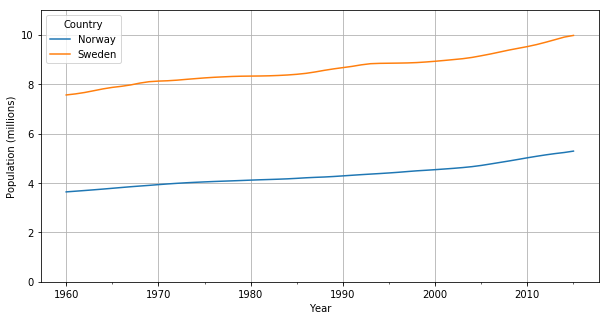

In [79]:
# Return Index with requested level removed
to_plot.columns = to_plot.columns.droplevel(0)

(to_plot / 10**6).plot(grid=True, figsize=(10, 5));
plt.ylabel('Population (millions)'); 
plt.ylim([0, 11]); plt.show()

## (6.4) Pivoting and melting

We'll show how pivoting and meling can help us create data for plotting.

In [80]:
# The tidy data set
df_world_tidy.head(3)

,Country,Year,Population
0,Aruba,1960-01-01,56225.0
1,Aruba,1961-01-01,56695.0
2,Aruba,1962-01-01,57032.0


The `.pivot()` method is more powerful than unstack. Both move rows up to the columns.

In [81]:
# Demonstrating the pivot method
# Return reshaped DataFrame organized by given index / column values.
df_world_pivot = df_world_tidy.pivot(index='Year', columns='Country', values='Population')
df_world_pivot.iloc[:5, :5]

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Year,,,,,
1960-01-01,9345868.0,1711319.0,11690153.0,21117.0,15370.0
1961-01-01,9533954.0,1762621.0,11985136.0,21882.0,16412.0
1962-01-01,9731361.0,1814135.0,12295970.0,22698.0,17469.0
1963-01-01,9938414.0,1864791.0,12626952.0,23520.0,18549.0
1964-01-01,10152331.0,1914573.0,12980267.0,24321.0,19647.0


In [82]:
# Drop every country where there are any missing values
df_world_pivot = df_world_pivot.dropna(how='any', axis=1)

In [83]:
# Compute the relative change since 1960
df_world_rel = (df_world_pivot / df_world_pivot.iloc[0, :])
df_world_pivot.iloc[:5, :5]

Country,Afghanistan,Albania,Algeria,American Samoa,Andorra
Year,,,,,
1960-01-01,9345868.0,1711319.0,11690153.0,21117.0,15370.0
1961-01-01,9533954.0,1762621.0,11985136.0,21882.0,16412.0
1962-01-01,9731361.0,1814135.0,12295970.0,22698.0,17469.0
1963-01-01,9938414.0,1864791.0,12626952.0,23520.0,18549.0
1964-01-01,10152331.0,1914573.0,12980267.0,24321.0,19647.0


The `.melt()` method is more powerful than stack. Both move columns up to the index.

> `unstack` and `stack` are inverses.   
  `pivot` and `melt` are inverses.

In [84]:
df_world_rel = df_world_rel.reset_index().melt(id_vars='Year', value_name='Population')
df_world_rel.iloc[:5, :5]

,Year,Country,Population
0,1960-01-01,Afghanistan,1.000000
1,1961-01-01,Afghanistan,1.020125
2,1962-01-01,Afghanistan,1.041247
3,1963-01-01,Afghanistan,1.063402
4,1964-01-01,Afghanistan,1.086291


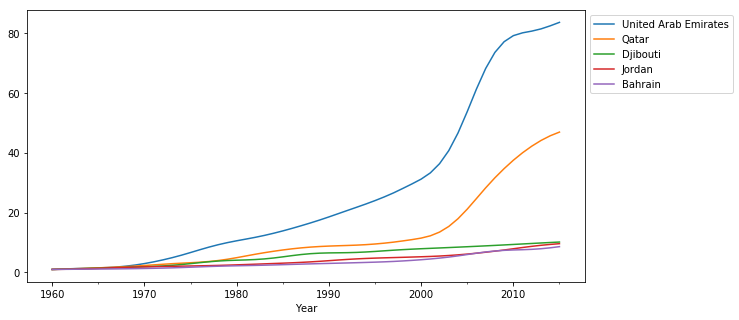

In [85]:
top_n = 5
countries = (df_world_rel
             .groupby('Country')
             .max()
             .Population
             .nlargest(top_n)
             .index)

(df_world_rel
 .pivot(index='Year', columns='Country', values='Population')
 .loc[:, countries].plot(figsize=(10, 5)))
plt.legend(bbox_to_anchor=(1,1));

## (6.4) Merging

![](https://www.dofactory.com/Images/sql-joins.png)

*Image source is https://www.dofactory.com/sql/join*

> **Tip.** Learning SQL is likely worth your time, see for instance [w3schools.com](https://www.w3schools.com/sql/default.asp) and [sqlzoo.net](https://sqlzoo.net/wiki/SELECT_names).

Add a column showing every directors average imdb score.

In [86]:
director_means = (df.groupby(df.director_name).mean().round(1)
                  .loc[:, ['imdb_score']]
                  .rename(columns={'imdb_score':'director_imdb_score'}))
director_means.head(1)

,director_imdb_score
director_name,
A. Raven Cruz,1.9


In [87]:
df.merge(director_means, how='left', left_on='director_name', right_index=True).head()

,director_name,gross,movie_title,country,content_rating,imdb_score,director_imdb_score
0,James Cameron,760505847.0,Avatar,USA,PG-13,7.9,7.9
1,Gore Verbinski,309404152.0,Pirates of the Caribbean: At World's End,USA,PG-13,7.1,7.0
2,Sam Mendes,200074175.0,Spectre,UK,PG-13,6.8,7.5
3,Christopher Nolan,448130642.0,The Dark Knight Rises,USA,PG-13,8.5,8.4
4,Doug Walker,NaN,Star Wars: Episode VII - The Force Awakens ...,NaN,NaN,7.1,7.1


The inner join, or `merge(how='inner')` can be used if you want the intersection.

In [88]:
# For every director which has made movies in the USA and Cananda
# get average imdb scores for both locations

american_directors = (df[df.country == 'USA'].groupby('director_name')
                      .mean().imdb_score.to_frame())
canadian_directors = (df[df.country == 'Canada'].groupby('director_name')
                      .mean().imdb_score.to_frame())

(american_directors.merge(canadian_directors, how='inner', 
                          left_index=True, right_index=True, 
                          suffixes=('_USA', '_Canada'))
                   .round(1)
                   .head())

,imdb_score_USA,imdb_score_Canada
director_name,,
Adam Shankman,6.2,5.5
Andrzej Bartkowiak,5.8,3.7
Atom Egoyan,6.3,7.0
Bennett Miller,7.6,7.4
Bob Clark,5.3,6.2


# (7) Plotting

## (7.1) Built-in `plot()` methods


Excellent for creating plots quickly. The downside is less control.

The built in plot options are:

- `line` : line plot (default)
- `bar` : vertical bar plot
- `barh` : horizontal bar plot
- `hist` : histogram
- `box` : boxplot
- `kde` : Kernel Density Estimation plot
- `density` : same as ‘kde’
- `area` : area plot
- `pie` : pie plot
- `scatter` : scatter plot
- `hexbin` : hexbin plot



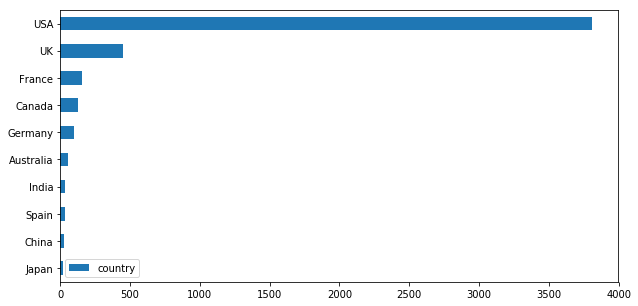

In [89]:
# Plot countries by number of occurences
(df.country
 .value_counts()
 .head(n=10)
 .sort_values(ascending=True)
 .to_frame()
 .plot.barh(figsize=(10, 5)));

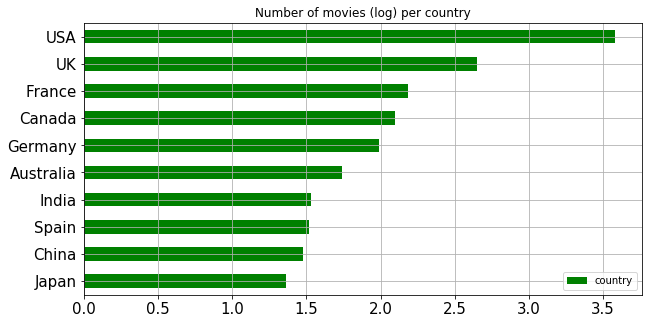

In [90]:
(df.country
 .value_counts()
 .head(n=10)
 .apply(np.log10)
 .sort_values(ascending=True)
 .to_frame()
 .plot.barh(grid=True, color='green', fontsize=15, 
            title='Number of movies (log) per country', figsize=(10, 5)));

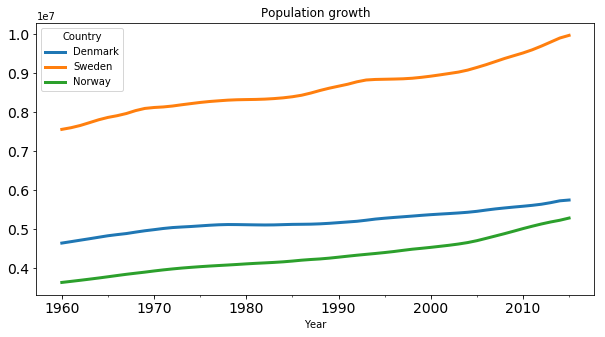

In [91]:
countries = set(['Norway', 'Sweden', 'Denmark'])
df_world_pivot.loc[:, countries].plot(linewidth=3, title='Population growth', 
                                      fontsize=14, figsize=(10, 5))

## (7.2) Using matplotlib

Greater control. Allows creating of publication-quality plots.   
Does require more code and knowledge of matplotlib.

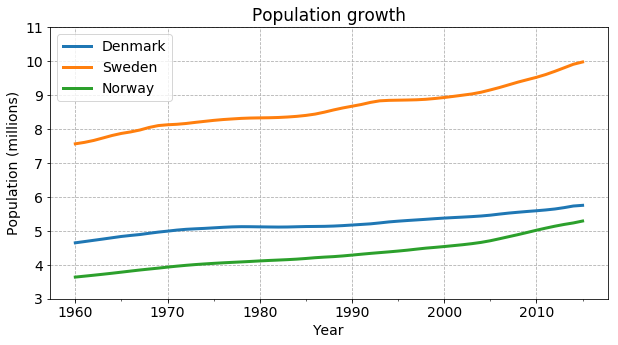

In [92]:
fig, ax = plt.subplots(figsize=(10, 5))

ax = (df_world_pivot.loc[:, countries] / 10**6).plot(ax=ax, lw=3, zorder=50)

ax.set_title('Population growth', fontsize=17)
ax.legend(fontsize=14, loc='upper left')
ax.tick_params(axis='both', which='both', labelsize=14)
ax.set_ylabel('Population (millions)', fontsize=14)
ax.set_xlabel(ax.get_xlabel(), fontsize=14)
ax.grid(True, zorder=-50, ls='--')
ax.set_ylim([3, 11]);

#plt.savefig('my_figure.pdf')

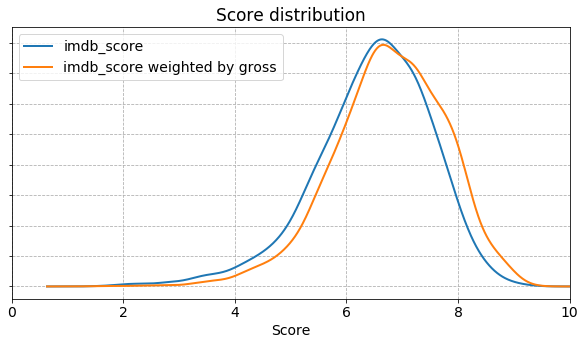

In [93]:
fig, ax = plt.subplots(figsize=(10, 5))

# Compute kernel density estimates
from KDEpy import FFTKDE
data = df[['imdb_score', 'gross']].dropna(how='any')

kde = FFTKDE(bw='ISJ', kernel='gaussian')

x, y = kde.fit(data.imdb_score.values).evaluate()
ax.plot(x, y, label='imdb_score', lw=2)

y = kde.fit(data.imdb_score.values, weights=data.gross.values).evaluate(x)
ax.plot(x, y, label='imdb_score weighted by gross', lw=2)

ax.set_title('Score distribution', fontsize=17)
ax.legend(fontsize=14, loc='upper left')
ax.tick_params(axis='x', which='both', labelsize=14)
ax.set_yticklabels([])
ax.set_xlabel('Score', fontsize=14)
ax.grid(True, zorder=-50, ls='--')
ax.set_xlim([0, 10]);

#plt.savefig('my_figure.pdf')

# (8) Time series manipulations

## (8.1) `.dt` accessors

Let's load a data set showing the popularity of the search words `python pandas`, `sas enterprise guide` and `microsoft excel` over the last 5 years. The data was fetched from Google Trends.

In [94]:
df_trends = pd.read_csv(r'data/google_trends.csv')
df_trends.head(2)

,Week,python pandas: (Worldwide),sas enterprise guide: (Worldwide),microsoft excel: (Worldwide)
0,2013-12-22,2,1,53
1,2013-12-29,2,1,62


In [95]:
# Some values are assigned `<1`, we set these to zero
for col in df_trends.columns:
    if df_trends[col].dtype != object:
        continue
    try:
        df_trends[col] = np.where(df_trends[col] == '<1', 0, df_trends[col])
        df_trends[col] = df_trends[col].apply(np.int)
    except:
        pass

    
# Change column names, set the 'Week' column to datetime, and use it as index
df_trends.columns = [c.split(':')[0] if ':' in c else c for c in df_trends.columns]
df_trends['Date'] = pd.to_datetime(df_trends['Week'])
df_trends = df_trends.set_index('Date').drop(columns='Week')

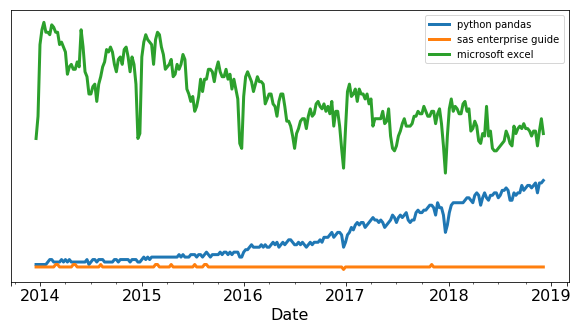

In [96]:
fig, ax = plt.subplots(figsize=(10, 5))
ax = df_trends.plot(ax=ax, lw=3, fontsize=16)
ax.set_xlabel('Date', fontsize=16); ax.set_yticks([]);
fig.savefig('pandas_vs_excel_vs_sas.png', dpi=100)

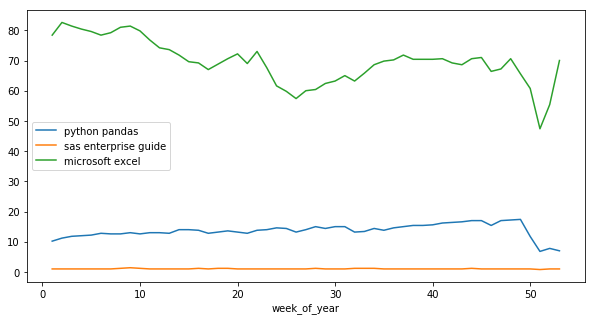

In [97]:
(df_trends
 .assign(week_of_year=lambda df: df.index.to_series().dt.week)
 .groupby('week_of_year')
 .mean()
.plot(figsize=(10, 5)))

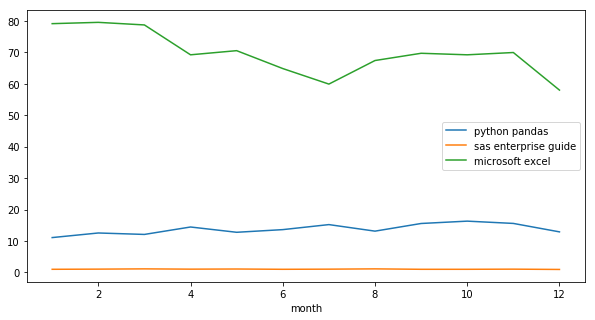

In [98]:
(df_trends
 .assign(month=lambda df: df.index.to_series().dt.month)
 .groupby('month')
 .mean()
.plot(figsize=(10, 5)))

## (8.2) Rolling window functions

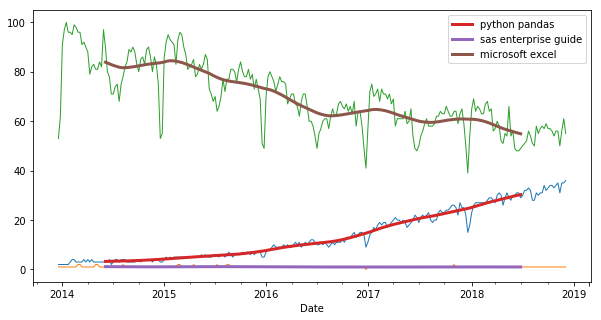

In [99]:
window = 48
fig, ax = plt.subplots(figsize=(10, 5))
ax = df_trends.plot(legend=False, lw=1, ax=ax);
df_trends.rolling(window, win_type='triang', center=True).mean().plot(ax=ax, lw=3);

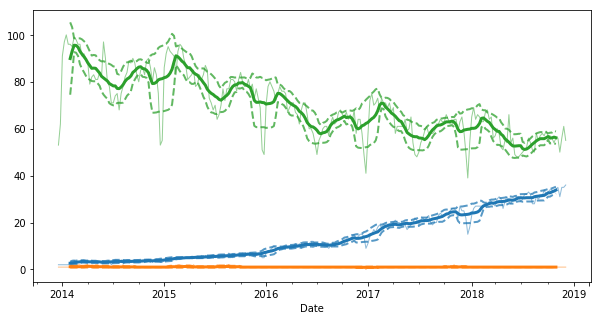

In [100]:
fig, ax = plt.subplots(figsize=(10, 5))
window = 12

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for column, color in zip(df_trends.columns, colors):
    ax = df_trends[column].plot(ax=ax, lw=1, color=color, alpha=0.5);
    avg = df_trends[column].rolling(window, center=True).mean()
    std = df_trends[column].rolling(window, center=True).agg(pd.Series.std)
    ax = avg.plot(ax=ax, lw=3, color=color, alpha=1);
    ax = (avg + std).plot(ax=ax, lw=2, color=color, alpha=0.75, ls='--');
    ax = (avg - std).plot(ax=ax, lw=2, color=color, alpha=0.75, ls='--');

## (8.3) Resampling

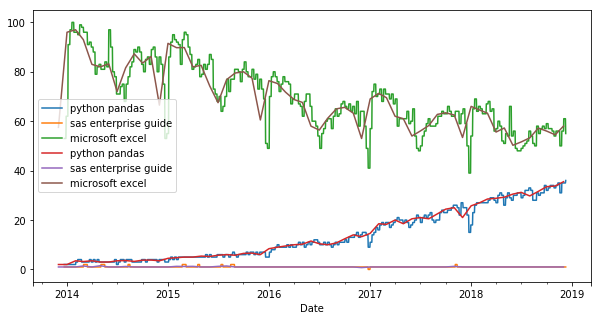

In [101]:
ax = df_trends.resample('d').pad().plot(figsize=(10, 5))
df_trends.resample('M').mean().plot(ax=ax);

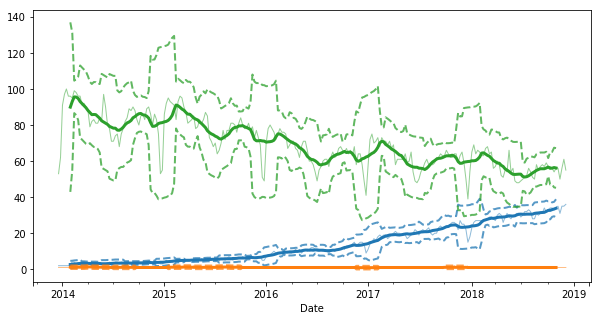

In [102]:
fig, ax = plt.subplots(figsize=(10, 5))
window = 12

agg_func = lambda ser: ser.max() - ser.min()

colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

for column, color in zip(df_trends.columns, colors):
    ax = df_trends[column].plot(ax=ax, lw=1, color=color, alpha=0.5);
    avg = df_trends[column].rolling(window, center=True).mean()
    std = df_trends[column].rolling(window, center=True).agg(agg_func)
    ax = avg.plot(ax=ax, lw=3, color=color, alpha=1);
    ax = (avg + std).plot(ax=ax, lw=2, color=color, alpha=0.75, ls='--');
    ax = (avg - std).plot(ax=ax, lw=2, color=color, alpha=0.75, ls='--');

# (9) Machine Learning and modeling

In [103]:
pd.set_option('display.max_rows', 2**6)
pd.set_option('display.max_columns', 2**6)

## (9.1) Dummy variables for categorical data

In [104]:
cols_to_use = ['movie_title', 'duration', 'genres', 'content_rating', 'budget', 'gross']
df_model = pd.read_csv(r'data/movie_metadata.csv', sep=',', usecols=cols_to_use)
print(f'Loaded data of size {df_model.shape} into memory.')

Loaded data of size (5043, 6) into memory.


In [105]:
# Drop any row with missing information
df_model = df_model.dropna(how='any')
df_model.shape

(3840, 6)

In [106]:
dummies = pd.get_dummies(df_model.content_rating)
dummies.head(2)

,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,0,1,0,0,0,0


In [107]:
df_model = df_model.merge(dummies, how='left', left_index=True, right_index=True)
df_model = df_model.drop(columns='content_rating', errors='ignore')
df_model.head(2)

,duration,gross,genres,movie_title,budget,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X
0,178.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,Avatar,237000000.0,0,0,0,0,0,0,0,1,0,0,0,0
1,169.0,309404152.0,Action|Adventure|Fantasy,Pirates of the Caribbean: At World's End,300000000.0,0,0,0,0,0,0,0,1,0,0,0,0


-----------------

A more advanced example follows.

In [108]:
from functools import reduce

# Split the genres, take the union over every set to get every genre in the data set
genres_sets = df_model.genres.str.split('|').apply(set)
genres = reduce(set.union, genres_sets)

In [109]:
# For every genre, add a dummy column
for genre in genres:
    df_model[genre] = np.where(df_model.genres.str.contains(genre), 1, 0)
    
df_model = df_model.drop(columns='genres', errors='ignore')

In [110]:
df_model.head(2)

,duration,gross,movie_title,budget,Approved,G,GP,M,NC-17,Not Rated,PG,PG-13,Passed,R,Unrated,X,Animation,Music,Action,Documentary,Fantasy,Musical,Comedy,Biography,Drama,Thriller,Romance,Family,Horror,War,Mystery,Adventure,Sci-Fi,History,Film-Noir,Sport,Western,Crime
0,178.0,760505847.0,Avatar,237000000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
1,169.0,309404152.0,Pirates of the Caribbean: At World's End,300000000.0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


## (9.2) Training a model

In [111]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [112]:
df_model['gross_log'] = df_model['gross'].apply(np.log1p)
df_model['budget_log'] = df_model['budget'].apply(np.log1p)

In [113]:
linreg = LinearRegression()
X = df_model.drop(columns=['movie_title', 'gross', 'budget', 'gross_log']).values
y = df_model.gross_log.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [114]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [115]:
y_pred = linreg.predict(X_test)

In [116]:
pd.Series(y_test.mean() - y_test).abs().mean()

1.6093703080115105

In [117]:
pd.Series(y_pred - y_test).abs().mean()

1.1842132628414064

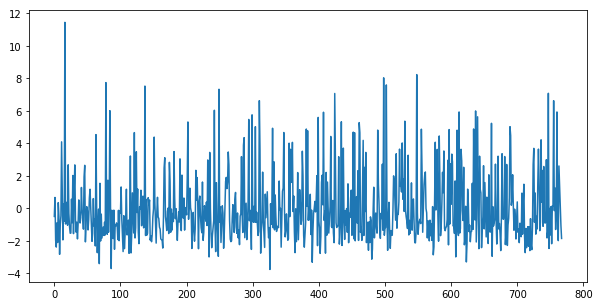

In [118]:
pd.Series(y_test.mean() - y_test).plot(figsize=(10, 5))

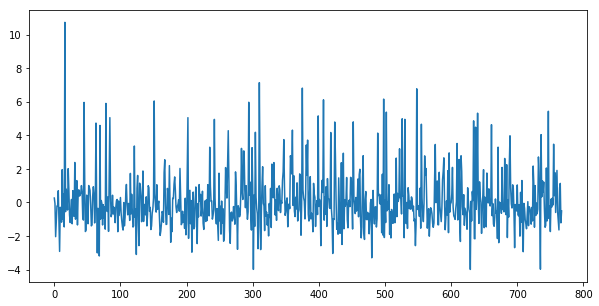

In [119]:
pd.Series(y_pred - y_test).plot(figsize=(10, 5))

# (10) Misc tips and tricks

## Performance

 ### Finding the n-largest

There might exists built in methods which are optimal for your use case. Finding the maximum is an $\mathcal{O}(n)$ operation, while sorting is $\mathcal{O}(n \log n)$. Finding the top $k$ rows can be done in $\mathcal{O}(k + n \log k)$ time.

In [120]:
# Create a series with a million entries
ser = pd.Series(np.random.randn(1000000))

In [121]:
(ser.nlargest(50) == ser.sort_values(ascending=False).head(50)).all()

True

In [122]:
%%timeit

ser.max()

4.08 ms ± 31.1 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [123]:
%%timeit

ser.nlargest(50)

18.6 ms ± 58.5 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [124]:
%%timeit

ser.sort_values(ascending=False).head(50)

166 ms ± 427 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


-------------

### Filter *before* computing

It's generally better to apply filters *before* computations, especially if the computations are expensive.

In [125]:
%%timeit

df.mean().imdb_score

56.2 ms ± 407 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [126]:
%%timeit

df.imdb_score.mean()

40.4 µs ± 352 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


-----------------

In [127]:
df = df.sort_values('gross').dropna(how='any')
temp = df.set_index('director_name').sort_index()

In [128]:
%%timeit

temp.loc[lambda df:df.index > 'o', :]

488 µs ± 2.86 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [129]:
%%timeit

df.loc[lambda df:df.director_name > 'o', :]

629 µs ± 3.1 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [130]:
%%timeit

temp.loc[slice('o', None), :]

133 µs ± 433 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [131]:
temp.index.dropna().is_monotonic

True

------------------------

### Vectorize everything (if you can)

In [132]:
import math

temp = df.gross.dropna()

In [133]:
%%timeit

temp.map(math.log)

892 µs ± 3.67 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [134]:
%%timeit

temp.apply(np.log)

128 µs ± 725 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


------------------

### Another vectorization example

In [135]:
import statistics

vector = np.arange(1000000)

In [136]:
%%timeit

np.mean(vector[1:] - vector[:-1])

1.73 ms ± 6.3 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [137]:
vector = list(vector)

In [138]:
%%timeit

statistics.mean((i - j for (i, j) in zip(vector[1:], vector[:-1])))

631 ms ± 7.55 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


----------------

In [139]:
df_countries = df.country.sample(5_000_000, replace=True).to_frame().reset_index(drop=True)
df_countries.head(3)

,country
0,USA
1,USA
2,USA


In [140]:
%%timeit

df_countries.assign(USA=lambda df:np.where(df.country == 'USA', 1, 0))

407 ms ± 1.46 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [141]:
%%timeit

def is_USA(string):
    if string == 'USA':
        return 1
    return 0

df_countries.assign(USA=lambda df:df.country.apply(is_USA))

1.54 s ± 14.6 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


# References

- [Official Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)
- Videos at [awesome-pandas](https://github.com/tommyod/awesome-pandas), especially